In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
#Importing the Tree and Metrics Module
from sklearn import metrics

#Decision Tree Algorithm and plot_tree function
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Train-Test Split
from sklearn.model_selection import train_test_split

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [20]:
df1 = df.iloc[:,0:14]
df1

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000
5,256,39,104594,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0
6,137,34,413978,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000
7,165,37,429027,100/300,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,0,0
8,27,33,485665,100/300,500,1442.99,0,FEMALE,PhD,other-service,golf,own-child,0,0
9,212,42,636550,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,0,-39300


In [5]:
df1.shape

(1000, 15)

In [7]:
df1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,203.95,38.95,546238.65,1136.00,1256.41,1101000.00,25126.10,-26793.70
std,115.11,9.14,257063.01,611.86,244.17,2297406.60,27872.19,28104.10
min,0.00,19.00,100804.00,500.00,433.33,-1000000.00,0.00,-111100.00
25%,115.75,32.00,335980.25,500.00,1089.61,0.00,0.00,-51500.00
50%,199.50,38.00,533135.00,1000.00,1257.20,0.00,0.00,-23250.00
75%,276.25,44.00,759099.75,2000.00,1415.70,0.00,51025.00,0.00
max,479.00,64.00,999435.00,2000.00,2047.59,10000000.00,100500.00,0.00


In [21]:
df1.dtypes

months_as_customer           int64
age                          int64
policy_number                int64
policy_csl                  object
policy_deductable            int64
policy_annual_premium      float64
umbrella_limit               int64
insured_sex                 object
insured_education_level     object
insured_occupation          object
insured_hobbies             object
insured_relationship        object
capital-gains                int64
capital-loss                 int64
dtype: object

In [9]:
to_drop = ['policy_csl']
df1.drop(to_drop,axis=1,inplace=True)

In [23]:
cat_cols = ['insured_hobbies','insured_relationship','insured_occupation','insured_sex','insured_education_level']
df2 = pd.get_dummies(df1,columns = cat_cols)

In [29]:
to_drop = ['policy_csl']
df2.drop(to_drop,axis=1,inplace=True)

In [30]:
df2.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
       'insured_hobbies_paintball', 'insured_hobbies_polo',
       'insured_hobbies_reading', 'insured_hobbies_skydiving',
       'insured_hobbies_sleeping', 'insured_hobbies_video-games',
       'insured_hobbies_yachting', 'insured_relationship_husband',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insu

In [31]:
### Check for missing values
total = df2.isnull().sum().sort_values(ascending=False)
total

months_as_customer                      0
insured_relationship_not-in-family      0
insured_relationship_own-child          0
insured_relationship_unmarried          0
insured_relationship_wife               0
insured_occupation_adm-clerical         0
insured_occupation_armed-forces         0
insured_occupation_craft-repair         0
insured_occupation_exec-managerial      0
insured_occupation_farming-fishing      0
insured_occupation_handlers-cleaners    0
insured_occupation_machine-op-inspct    0
insured_occupation_other-service        0
insured_occupation_priv-house-serv      0
insured_occupation_prof-specialty       0
insured_occupation_protective-serv      0
insured_occupation_sales                0
insured_occupation_tech-support         0
insured_occupation_transport-moving     0
insured_sex_FEMALE                      0
insured_sex_MALE                        0
insured_education_level_Associate       0
insured_education_level_College         0
insured_education_level_High Schoo

In [32]:
x = df2.drop(["insured_sex_FEMALE"], axis=1)
y = df2["insured_sex_FEMALE"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 56), (250, 56), (750,), (250,))

In [33]:
## Scale the dataset

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

#Train the model
clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25)

In [35]:
y_pred = clf.predict(x_test_scaled)

#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

100.00%


In [36]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250




In [37]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[129   0]
 [  0 121]]


In [38]:
#Encode Confusion Matrix into a DataFrame

#Set Labels
labels = list(y_test.unique())

#Get confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#Convert to DataFrame
cm_df = pd.DataFrame(cm,index=labels, columns=labels)

cm_df

,1,0
1,129,0
0,0,121


### Feature Importance

In [39]:
#Extract the feature importance
f_importance = clf.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)

,Importance
insured_sex_MALE,1.00
months_as_customer,0.00
insured_occupation_other-service,0.00
insured_relationship_other-relative,0.00
insured_relationship_own-child,0.00
insured_relationship_unmarried,0.00
insured_relationship_wife,0.00
insured_occupation_adm-clerical,0.00
insured_occupation_armed-forces,0.00
insured_occupation_craft-repair,0.00


<AxesSubplot:>

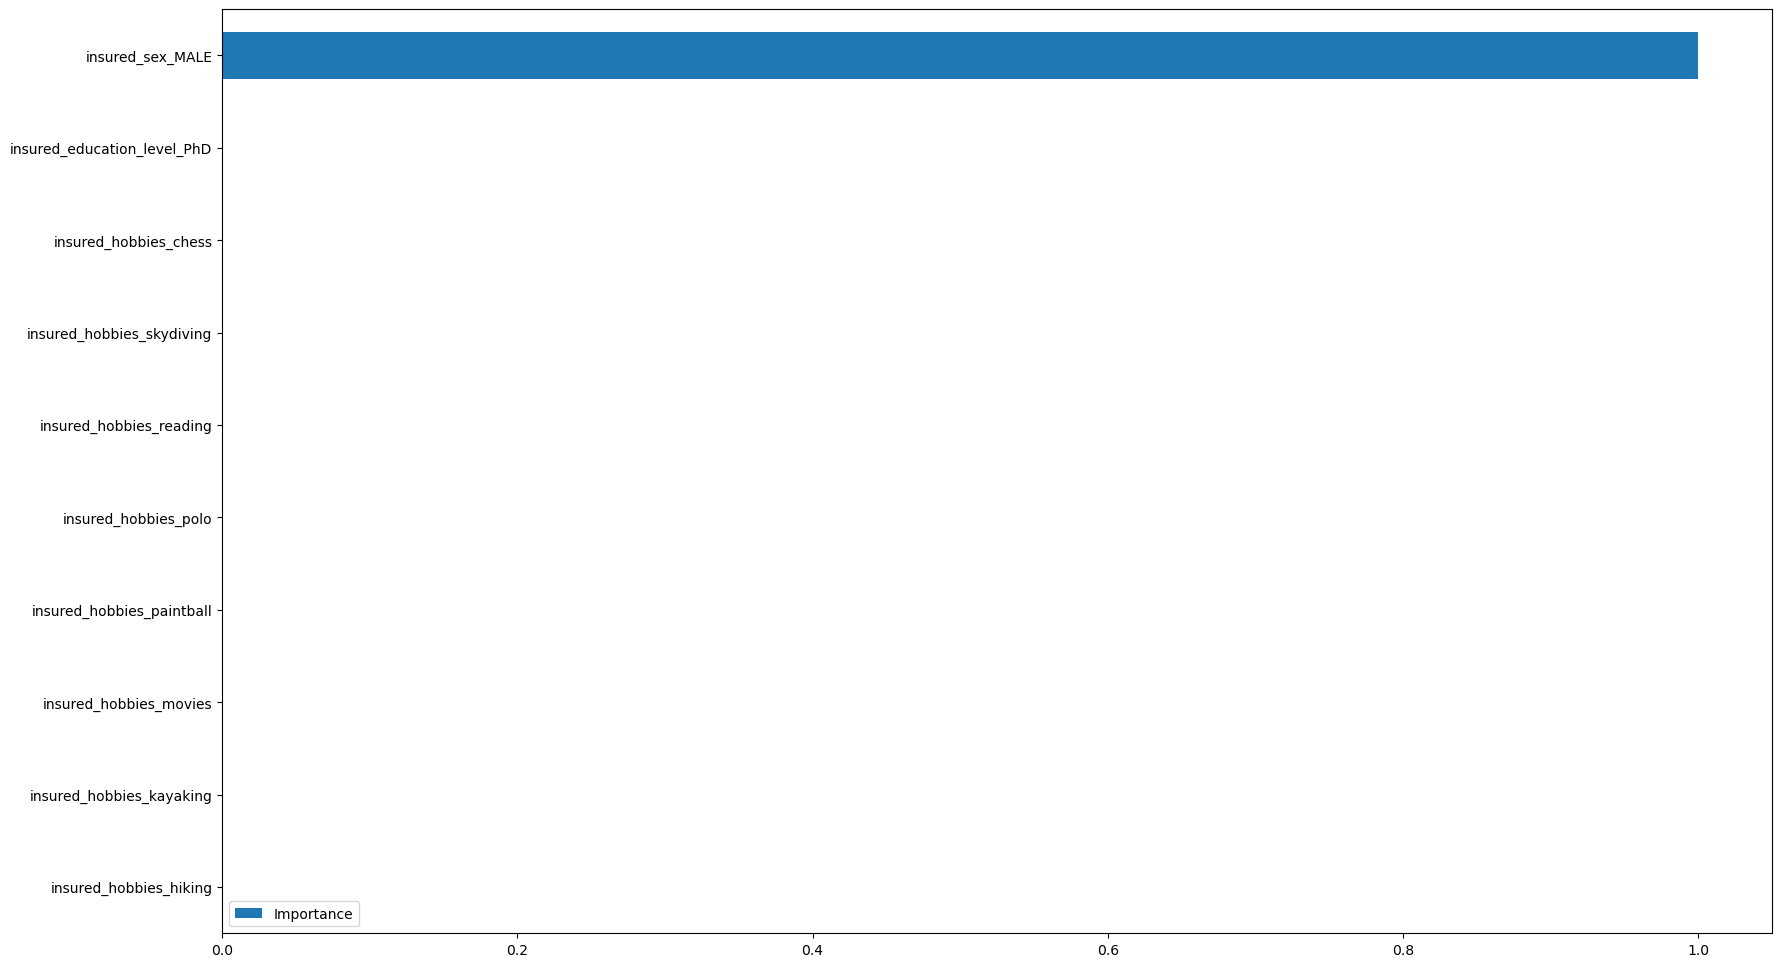

In [40]:
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(20,12))

In [41]:
feature_col = list(x_train.columns)

#Get classes
classes = clf.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['0', '1']

### Visualize Decision Tree

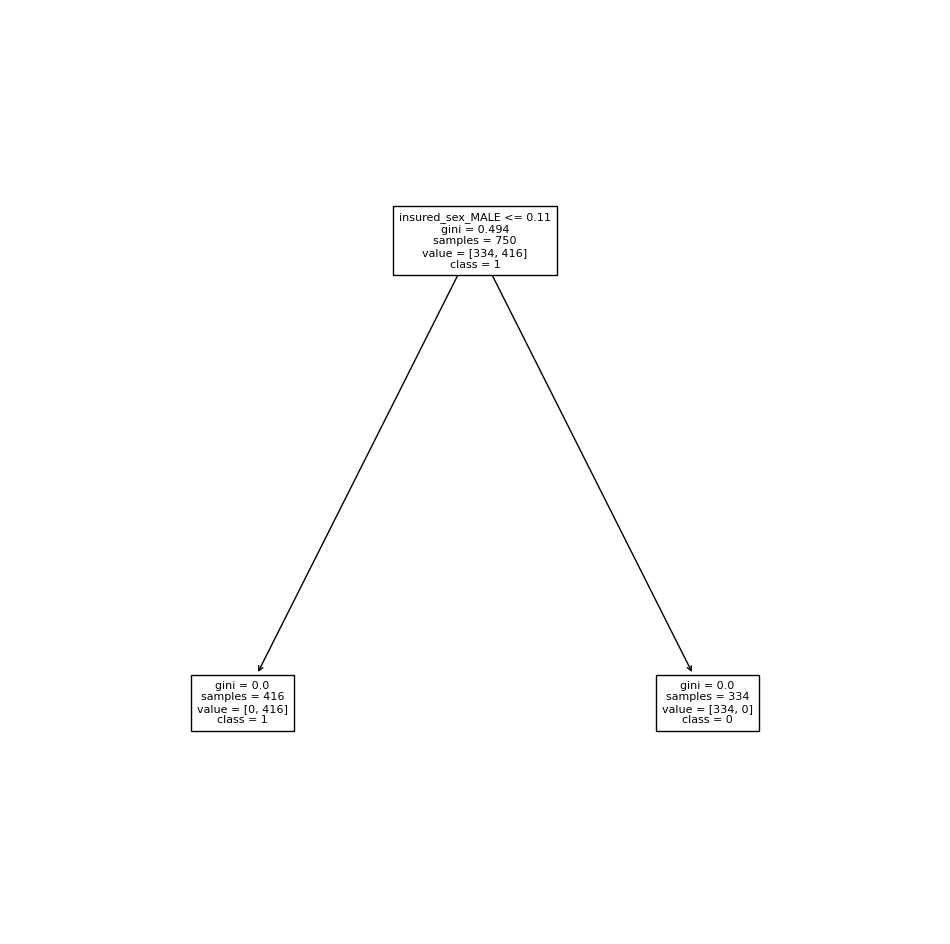

In [42]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#Use the plot tree function
plot_tree(clf, class_names=classes, feature_names=feature_col, fontsize=8, max_depth=3)

#Show the Plot
plt.show()

### Cross Validation

In [43]:
#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [44]:
# Create a pipeline to add scaling to the original dataframe 
#(we want to scale based on the train partitions on every fold)

from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

model = make_pipeline(StandardScaler(), clf)

cv_results = cross_val_score(model, x_train, y_train, cv=5)

print(cv_results)

[1. 1. 1. 1. 1.]


In [45]:
#Get the Mean to get the average accuracy 
print("Accuracy: {:.2%}".format(np.mean(cv_results)))

Accuracy: 100.00%


In [46]:
cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
print (cv_results)

{'fit_time': array([0.0109973 , 0.01200294, 0.01193261, 0.00899816, 0.01100039]), 'score_time': array([0.00999975, 0.00900102, 0.00800085, 0.00700164, 0.00818396]), 'test_accuracy': array([1., 1., 1., 1., 1.]), 'test_f1_weighted': array([1., 1., 1., 1., 1.]), 'test_roc_auc': array([1., 1., 1., 1., 1.])}


In [47]:
df_scores = pd.DataFrame(cv_results)

print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.01        0.01           1.00              1.00          1.00
1      0.01        0.01           1.00              1.00          1.00
2      0.01        0.01           1.00              1.00          1.00
3      0.01        0.01           1.00              1.00          1.00
4      0.01        0.01           1.00              1.00          1.00
Averages 
Accuracy: 100.000000%, f1: 100.000000%, roc_auc: 100.000000%


In [48]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=20, random_state=25)
model = make_pipeline(StandardScaler(), clf )


cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
df_scores = pd.DataFrame(cv_results)
df_scores
print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.01        0.01           1.00              1.00          1.00
1      0.01        0.01           1.00              1.00          1.00
2      0.01        0.01           1.00              1.00          1.00
3      0.01        0.01           1.00              1.00          1.00
4      0.01        0.01           1.00              1.00          1.00
Averages 
Accuracy: 100.000000%, f1: 100.000000%, roc_auc: 100.000000%


### Build Model Parameter

In [49]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)
model = make_pipeline(StandardScaler(), clf )

clf.fit(x_train_scaled, y_train)

y_pred = clf.predict(x_test_scaled)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


